In [1]:
import ROOT
from IPython.display import  Audio
sound_file= 'sounds/dscybsit.wav'

Welcome to JupyROOT 6.16/00


In [2]:
file = ROOT.TFile.Open("../output/Charmonium2018B_test/dzero_m21_charmonium_2018B.root")

mass = ROOT.RooRealVar("mass", "", 1.75, 1.96)
x_range = [1.75, 1.96]
bin_widht = 20e-4
n_bins = int((x_range[1] - x_range[0]) / bin_widht)
mass.setBins(99)

data = ROOT.RooDataSet("data", "", file.Dzero, ROOT.RooArgSet(mass))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision


In [3]:
## Signal definition: Gaussian 

frac_signal = ROOT.RooRealVar("frac signal", "", 0.2, 0.0, 1.0)
mean = ROOT.RooRealVar("mean", "", 1.864, 1.830, 1.890)
sigma = ROOT.RooRealVar("sigma", "",  0.011, 0.00001, 0.999)

frac_signal2 = ROOT.RooRealVar("frac signal", "", 0.2, 0.0, 1.0)
sigma2 = ROOT.RooRealVar("sigma", "",  0.011, 0.00001, 0.999)

# pdf
gauss = ROOT.RooGaussian("gauss", "", mass, mean, sigma)
gauss2 = ROOT.RooGaussian("gauss2", "", mass, mean, sigma2)

In [4]:
## Background definition: Third degree polynomial (p0 x³ + p1 x² + p2 x + 1)

#yield_back = ROOT.RooRealVar("yield background", "", 1e5, 0, 1.5e5)
p0 = ROOT.RooRealVar("p0", "", 78, 50, 100)
p1 = ROOT.RooRealVar("p1", "", -15, -20, -10)
p2 = ROOT.RooRealVar("p2", "",  -9, -15, -5)


back = ROOT.RooPolynomial("Third degree polynomial", "", mass, ROOT.RooArgList(p0, p1, p2))

In [5]:
# Model definition and fitting
model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(gauss, back),
                       ROOT.RooArgList(frac_signal), ROOT.kTRUE)


In [6]:
result = model.fitTo(data, ROOT.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss,Third degree polynomial)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac signal   2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean         1.86400e+00  6.00000e-03    1.83000e+00  1.89000e+00
     3 p0           7.80000e+01  5.00000e+00    5.00000e+01  1.00000e+02
     4 p1          -1.50000e+01  1.00000e+00   -2.00000e+01 -1.00000e+01
     5 p2          -9.00000e+00  1.00000e+00   -1.50000e+01 -5.00000e+00
     6 sigma        1.10000e-02  5.49500e-03    1.00000e-05  9.99000e-01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 N

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (Third degree polynomial)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can
Info in <TCanvas::Print>: png file Dzero_fit.png has been created


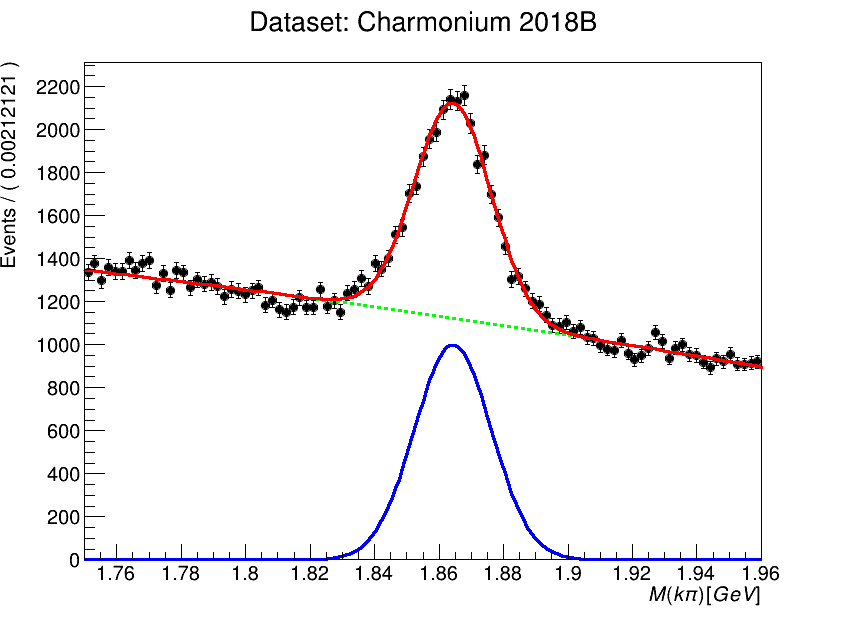

In [22]:
# Colors and styles
colors = {"model" : 2, "signal" : 4, "background" : 3}
styles = {"model" : 1, "signal" : 1, "background" : 2}

can = ROOT.TCanvas("can", "histograms", 850, 650)

# Frame creation
frame1 = mass.frame(ROOT.RooFit.Title("Dataset: Charmonium 2018B"), ROOT.RooFit.Bins(99))
frame1.GetXaxis().SetTitle("M(k\pi) [GeV]")
## Plots

# Data
data.plotOn(frame1, ROOT.RooFit.Name("Data"), ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))

# Signal
model.plotOn(frame1, ROOT.RooFit.Name("Signal"), ROOT.RooFit.Components("gauss"), ROOT.RooFit.LineStyle(styles["signal"]), ROOT.RooFit.LineColor(colors["signal"]))

# Background
model.plotOn(frame1, ROOT.RooFit.Name("Background"), ROOT.RooFit.Components("Third degree polynomial"), ROOT.RooFit.LineStyle(styles["background"]), ROOT.RooFit.LineColor(colors["background"]))

# Model
model.plotOn(frame1, ROOT.RooFit.Name("Model"), ROOT.RooFit.LineStyle(styles["model"]), ROOT.RooFit.LineColor(colors["model"]))

## ChiSquare computation
n_param = result.floatParsFinal().getSize()
reduced_chi_square = frame1.chiSquare(n_param)

## Legends

# Legend box for data, model..
leg = ROOT.TLegend(0.7, 0.7, 0.90, 0.90)
leg.AddEntry(frame1.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame1.findObject("Model"), "Model Fit", "L")
leg.AddEntry(frame1.findObject("Signal"), "Signal Fit", "L")
leg.AddEntry(frame1.findObject("Background"), "Background fit", "L")

# Legende box for fit parameters
t = ROOT.TText(0.2, 0.2, 'show')

text = ROOT.TLatex(.7,.7,'sho2')

frame1.Draw()
#leg.Draw("same")
#t.Draw("same")
text.Draw("same")

t = ROOT.TText(.5,.5,"Hello World !");
t.SetTextAlign(22);
t.SetTextColor(ROOT.kRed+2);
t.SetTextFont(43);
t.SetTextSize(40);
t.SetTextAngle(45);
t.Draw("same");

can.Draw()

can.SaveAs("Dzero_fit.png")

In [8]:
reduced_chi_square

1.1961446943912342

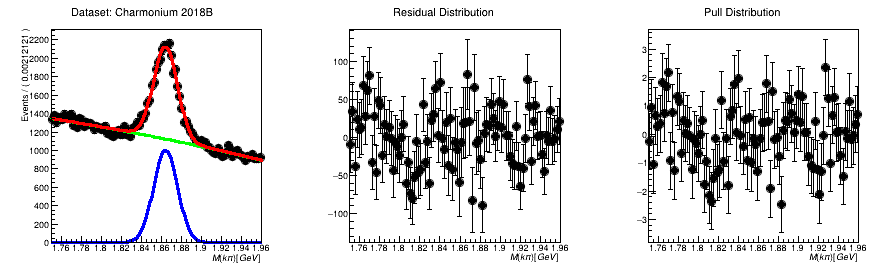

In [9]:
# Takes pull and residual histograms
histpull = frame1.pullHist()
histresid = frame1.residHist() 

# New frame to draw residual distribution

frame2 = mass.frame(ROOT.RooFit.Title("Residual Distribution"))
frame2.GetXaxis().SetTitle("M(k\pi) [GeV]")

# Add the distribution to the frame
frame2.addPlotable(histresid,"P") 

# New frame to draw pull distribution

frame3 = mass.frame(ROOT.RooFit.Title("Pull Distribution"))
frame3.GetXaxis().SetTitle("M(k\pi) [GeV]")

# Add the distribution to the frame
frame3.addPlotable(histpull, "P")

# New canvas to draw our distributions
can2 = ROOT.TCanvas("can2", "Residual_pull", 900, 300)
can2.Divide(3)

can2.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.6)
frame1.Draw()

can2.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.6)
frame2.Draw()

can2.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)
frame3.Draw()

can2.Draw()


In [10]:
# To save workspace
wspace = ROOT.RooWorkspace("Dstar fit")

getattr(wspace, "import")(data)
getattr(wspace, "import")(model)

wspace.writeToFile("Dzero_fit.root")

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing dataset data
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooAddPdf::model
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooGaussian::gauss
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::mean
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::sigma
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::frac signal
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooPolynomial::Third degree polynomial
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::p0
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::p1
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::p2
[#1] INFO:ObjectHandl

In [39]:
Audio(sound_file, autoplay=True)

In [ ]:
chisquare = frame1.chiSquare(nparams)